# Рабочая тетрадь № 4
Регрессия – это зависимость среднего значения какой-либо величины
от некоторой другой величины или от нескольких других величин. В
отличие от чисто функциональной зависимости 𝑦 = 𝑓(𝑥), когда каждому
значению независимой переменной 𝑥 соответствует одно определённое
значение зависимой переменной у, при регрессионной связи одному и тому
же значению независимой переменной (фактору) 𝑥 могут соответствовать в
зависимости от конкретного случая различные значения зависимой
переменной (отклика) у.
Изучение регрессии основано на том, что случайные величины Х и 𝑌
связаны между собой вероятностной зависимостью: при каждом
конкретном значении 𝑋 = 𝑥 величина 𝑌 является случайной величиной с
вполне определённым распределением вероятностей. Зависимость
зависимой переменной – отклика от одной независимой переменной –
фактора или нескольких факторов называется уравнением регрессии. По
количеству факторов выделяют парную (однофакторную) и
множественную (многофакторную) регрессию. Для парной будем
рассматривать следующие методы регрессии: линейную, показательную,
экспоненциальную, гиперболическую и параболическую.
Регрессионный анализ – это раздел математической статистики,
изучающий регрессионную зависимость между случайными величинами по
статистическим данным. Цель регрессионного анализа состоит в
определении общего вида уравнения регрессии, вычислении оценок
неизвестных параметров, входящих в уравнение регрессии проверке
статистических гипотез о регрессионной связи.
Таким образом, регрессионный анализ – набор статистических
методов исследования влияния одной или нескольких независимых
переменных 𝑋1, ... , 𝑋𝑛 на зависимую переменную 𝑌. Независимые
переменные иначе называют регрессорами или предикторами, а зависимые
переменные – критериальными переменными.

#### 1.1. Теоретический материал - Линейные регрессионные модели
Линейная регрессия
Линейная регрессия (Linear regression) – модель зависимости переменной
x от одной или нескольких других переменных (факторов, регрессоров,
независимых переменных) с линейной функцией зависимости. Линейная
регрессия относится к задаче определения «линии наилучшего соответствия»
через набор точек данных и стала простым предшественником нелинейных
методов, которые используют для обучения нейронных сетей.
Цель линейной регрессии — поиск линии, которая наилучшим образом
соответствует этим точкам. Напомним, что общее уравнение для прямой есть
𝑓 (𝑥) = 𝑏 + 𝑚 ⋅ 𝑥 +, где 𝑚 – наклон линии, а 𝑏 – его сдвиг.
Функция потерь — метод наименьших квадратов
Функция потерь – это мера количества ошибок, которые наша линейная
регрессия делает на наборе данных. Хотя есть разные функции потерь, все они
вычисляют расстояние между предсказанным значением 𝑦(х) и его
фактическим значением.
Одна очень распространенная функция потерь называется средней
квадратичной ошибкой MSE. Чтобы вычислить MSE, мы просто берем все
значения ошибок, считаем их квадраты длин и усредняем.
Задача экраполяции
Допустим у нас есть много экспериментальных точек. Необходимо через
них провести кривую, которая как можно ближе проходила к этим точкам. При
этом необходимо минимизировать среднюю квадратичную ошибку (MSE).
Для решения данной задачи в Python есть множество библиотек. Самыми
распостраненными выступают:
numpy - numpy.linalg.lstsq
scipy - scipy.linalg (содержит все функции из numpy.linalg плюс часть
новых функций, которых нет в numpy.linalg).

#### 1.1.1 Пример
#### Задача:
Проведем прямую y = mx + b через экспериментальные точки.

[[0. 1.]
 [1. 1.]
 [2. 1.]
 [3. 1.]]
0.9999999999999999 -0.9499999999999997


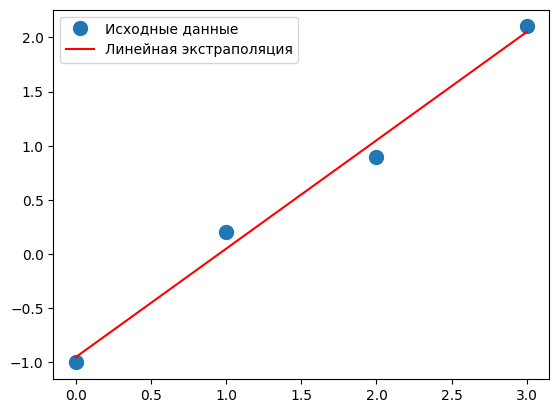

In [3]:
import numpy as np

x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

# Перепишем линейное уравнение y = mx + c как y = Ap, де A = [[ x 1 ]] и [[m], [c]]
# Построим A по x:
A = np.vstack([x, np.ones(len(x))]).T
print(A)

# Используем метод lstsq для решения его относительно вектора p.
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
print(m, c)

# Построим график полученной прямой и укажем на нем точки.
import matplotlib.pyplot as plt

plt.plot(x, y, 'o', label='Исходные данные', markersize=10)
plt.plot(x, m * x + c, 'r', label='Линейная экстраполяция')
plt.legend()
plt.show()

#### 1.1.2 Пример
Задача:
Пусть 𝑥, 𝑦 – вектора длиной 𝑛 > 3 (точек > 3). Задача заключается в
построении эстраполяционного полинома второго порядка (параболы). Таким
образом, необходимо найти такие коэффициенты поринома 𝑎, 𝑏, 𝑐 по методу
наименьших квадратов. Данные мтогут быть получены в результате
измерений. Покажем пример генерации данных случайным образом и
загрузки их из файла.

[-4.50336352 -3.5760382  -2.59476303 -2.1658499  -1.25396705 -0.17018418
  0.78594543  1.55240521  2.50679146  3.52611435  5.44009775]
[25.37793592 15.77276712  8.55971043  4.17227467  0.85734655  0.37025335
  1.0660749   4.35499253  9.16925952 15.96898399 25.36904487]


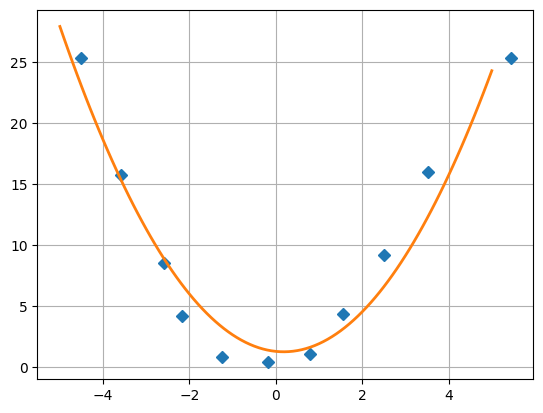

In [8]:
from numpy import *
from numpy.random import *

# Генерируем случайные x и y
delta = 1.0
x = linspace(-5, 5, 11)
y = x ** 2 + delta * (rand(11) - 0.5)
x += delta * (rand(11) - 0.5)

# Записываем данные в файл
x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')

# Читаем данные из файлов
x = fromfile('x_data.txt', float, sep='\n')
y = fromfile('y_data.txt', float, sep='\n')

print(x)
print(y)

# Нахождение коэффициентов функции вида y = ax^2 + bx + c методом наименьших квадратов
# Задаем вектор m = [x**2, x, E]
m = vstack((x ** 2, x, ones(11))).T
# находим коэффициенты при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond=None)[0]

# на отрезке [-5,5]
x_prec = linspace(-5, 5, 101)
# Рисуем точки
plt.plot(x, y, 'D')
# Рисуем кривую вида y = ax^2 + bx + c, подставляя из решения коэффициент s[0], s[1], s[2]
plt.plot(x_prec, s[0] * x_prec ** 2 + s[1] * x_prec + s[2], '-', lw=2)
plt.grid()
plt.savefig('парабола.png')

#### 1.1.3 Пример
Задача:
По данным предыдущего примера постройте эстраполяционного полинома
третьего порядка

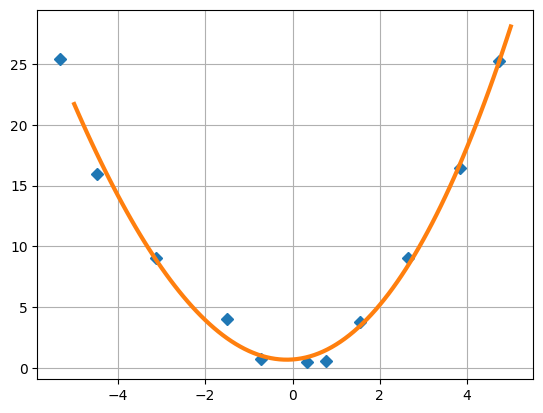

In [7]:
# Решение
# Нахождение коэффициентов функции вида y = ax^3 + bx^2 + cx + d методом наименьших квадратов
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt

delta = 1.0
x = linspace(-5, 5, 11)
y = x ** 2 + delta * (rand(11) - 0.5)
x += delta * (rand(11) - 0.5)
# 3 степени
# Нахождение коэффициентов функции вида y = ax^3 + bx^2 + cx + d методом наименьших квадратов
# Задаем вектор  m = [x**3, x, E]
m = vstack((x ** 3, x ** 2, x, ones(11))).T
# Находим коэффициенты при составляющих вектора m
s = linalg.lstsq(m, y, rcond=None)[0]

# На отрезке [-5,5]
x_prec = linspace(-5, 5, 101)
# рисуем точки
plt.plot(x, y, 'D')
# рисуем кривую вида y = ax^3 + bx ^2 + cx + d, подставляя из решения коэффициенты s[0], s[1], s[2], s[3]
plt.plot(x_prec, s[0] * x_prec ** 3 + s[1] * x_prec ** 2 + s[2] * x_prec + s[3], '-', lw=3)
# plt.plot(x_prec, s[0] * x_prec ** 3 + s[1] * x_prec ** 2, '-', lw=3)
plt.grid()
plt.savefig('полином 3-й степени.png')

#### Задание
Представьте собственные данные и постройте экстраполяцию полиномами первой, второй и третьей степени

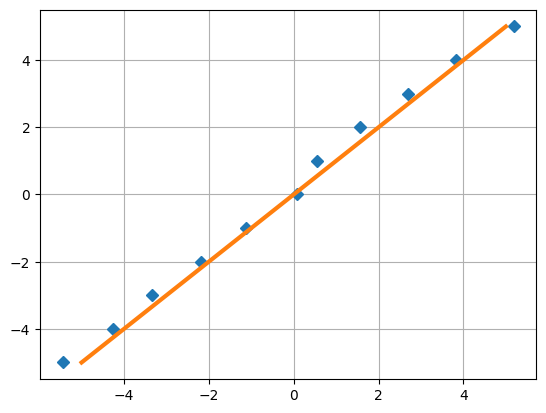

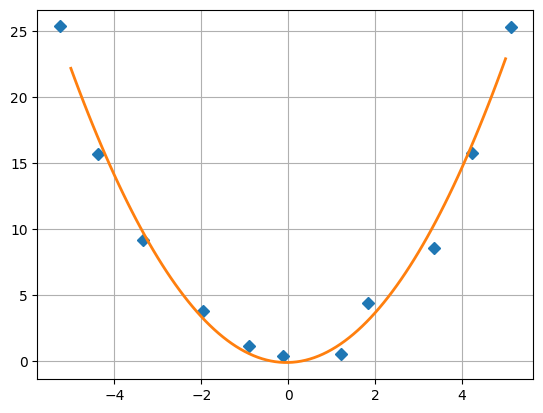

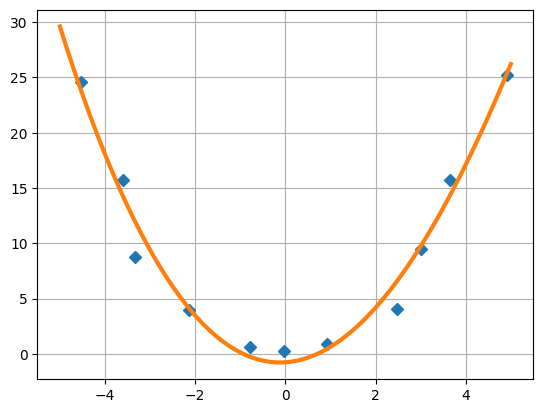

In [10]:
# Полином 1-ой степени
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt

delta = 1.0
x = linspace(-5, 5, 11)
y = linspace(-5, 5, 11)
x += delta * (rand(11) - 0.5)
m = vstack((x, ones(11))).T
s = linalg.lstsq(m, y, rcond=None)[0]
x_prec = linspace(-5, 5, 101)
plt.plot(x, y, 'D')
plt.plot(x_prec, x_prec, '-', lw=3)
plt.grid()
plt.savefig('полином 1-й степени.png')
plt.show()

# 2 степени
# Генерируем случайные x и y
delta = 1.0
x = linspace(-5, 5, 11)
y = x ** 2 + delta * (rand(11) - 0.5)
x += delta * (rand(11) - 0.5)

# Нахождение коэффициентов функции вида y = ax^2 + bx + c методом наименьших квадратов
# Задаем вектор m = [x**2, x, E]
m = vstack((x ** 2, x, ones(11))).T
# находим коэффициенты при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond=None)[0]

# на отрезке [-5,5]
x_prec = linspace(-5, 5, 101)
# Рисуем точки
plt.plot(x, y, 'D')
# Рисуем кривую вида y = ax^2 + bx + c, подставляя из решения коэффициент s[0], s[1], s[2]
plt.plot(x_prec, s[0] * x_prec ** 2 + s[1] * x_prec + s[2], '-', lw=2)
plt.grid()
plt.savefig('парабола.png')
plt.show()
# 3 степени
delta = 1.0
x = linspace(-5, 5, 11)
y = x ** 2 + delta * (rand(11) - 0.5)
x += delta * (rand(11) - 0.5)
# 3 степени
# Нахождение коэффициентов функции вида y = ax^3 + bx^2 + cx + d методом наименьших квадратов
# Задаем вектор  m = [x**3, x, E]
m = vstack((x ** 3, x ** 2, x, ones(11))).T
# Находим коэффициенты при составляющих вектора m
s = linalg.lstsq(m, y, rcond=None)[0]

# На отрезке [-5,5]
x_prec = linspace(-5, 5, 101)
# рисуем точки
plt.plot(x, y, 'D')
# рисуем кривую вида y = ax^3 + bx ^2 + cx + d, подставляя из решения коэффициенты s[0], s[1], s[2], s[3]
plt.plot(x_prec, s[0] * x_prec ** 3 + s[1] * x_prec ** 2 + s[2] * x_prec + s[3], '-', lw=3)
# plt.plot(x_prec, s[0] * x_prec ** 3 + s[1] * x_prec ** 2, '-', lw=3)
plt.grid()
plt.savefig('полином 3-й степени.png')
plt.show()

#### 1.1.4 Пример
Задача:
Необходимо проверить гипотезу, что наши точечно заданная функция ложится
на кривую вида 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑒𝑥𝑝(−𝑏2𝑥2)

0.00021083368624889604
0.10734757885172454


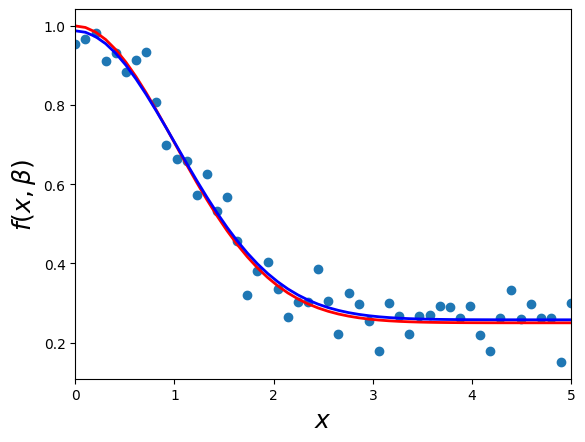

In [11]:
# Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75, 0.5)
import numpy as np

beta = (0.25, 0.75, 0.5)


def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x ** 2)


# Зададим массив точек xi
xdata = np.linspace(0, 5, 50)
# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))

# Используем функцию для получения решения в виде коэффициентов функции f(x) для указанных xdata и ydata
from scipy.optimize import curve_fit
import scipy as sp

beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
beta_opt

# Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

#### 1.1.5 Пример
Задача:
Необходимо проверить гипотезу, что наши точечно заданная функция ложится
на кривые вида:
1) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥
2) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥 + 𝑏2𝑥2
3) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑙𝑛(𝑥)
4) 𝑓(𝑥, 𝑏) = 𝑏0 𝑥𝑏1

[0.26632944 0.74582197]
9.751092589807848e-05
0.08574236782996385


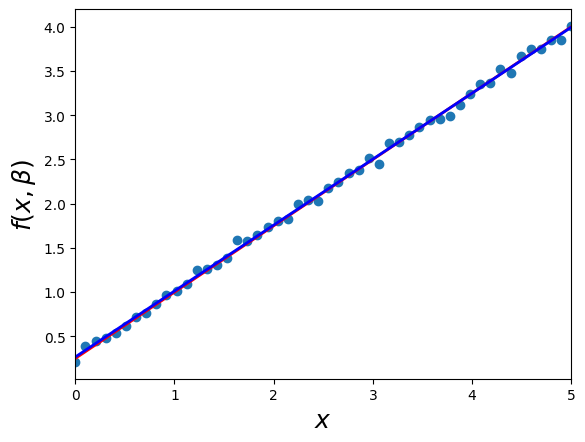

[0.25012123 0.75138914 1.        ]
inf
0.09980697466426877


C:\Users\79021\Desktop\AI\venv\Lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


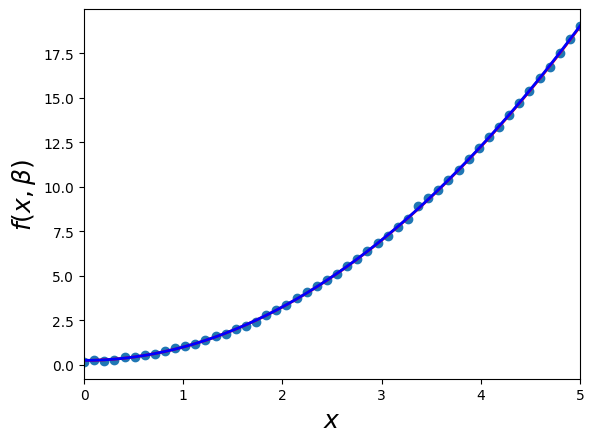

[1.01806567 1.98257754]
4.829420324769566e-05
0.11167751923168164


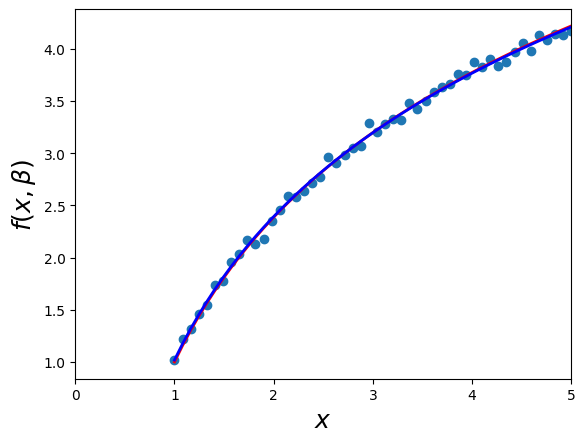

[1.00058747 1.99942088]
4.154994092451937e-06
0.09862005418771887


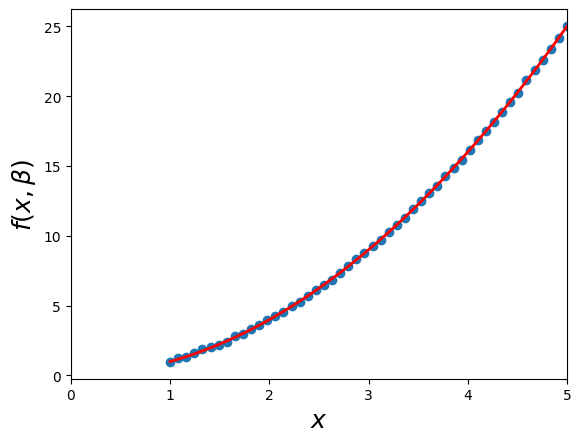

In [14]:
# Решение
# 1
# Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75)
beta = (0.25, 0.75)


def f(x, b0, b1):
    return b0 + b1 * x


# Зададим массив точек xi
xdata = np.linspace(0, 5, 50)
# Создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# Зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
# Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# Вычислим кадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

# Решение
# 2
# Добавим шума в данные, сделанные по функции f(x,b) c коэффициентами b = (0.25, 0.75, 0.5)
beta = (0.25, 0.75, 0.5)


def f(x, b0, b1, b2):
    return b0 + b1 * x * x


# Зададим массив точек xi
xdata = np.linspace(0, 5, 50)
# Создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# Зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
# Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

# Решение
# 3
# Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (1,2)
beta = (1, 2)


def f(x, b0, b1):
    return b0 + b1 * np.log(x)


# Зададим массив точек xi
xdata = np.linspace(1, 5, 50)
# Создадим теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# Зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

# Решение
# 4
# Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (1,2)
beta = (1, 2)


def f(x, b0, b1):
    return b0 * x ** b1


# Зададим массив точек xi
xdata = np.linspace(1, 5, 50)
# Создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# Зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
# Вычисляем линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

#### Задание:
Подставьте собственные данные и поэкспериментируйте с представленными функциями. Проанализируйте изменения данных.

[0.26875352 0.74694803]
0.0003880487174174025
0.12192884656536507


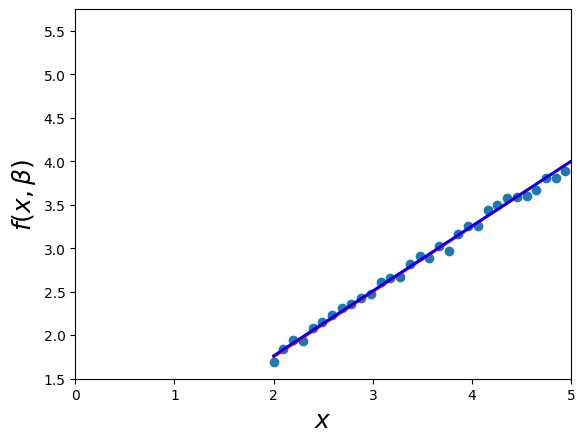

[0.27314093 0.74937707 1.        ]
inf
0.14132739294497515


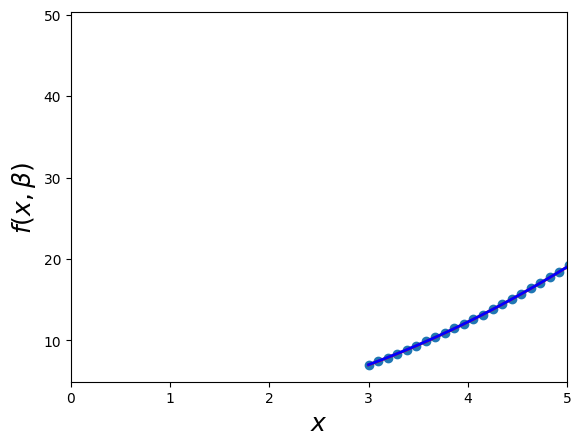

[1.00251131 1.99901074]
5.459305318583705e-06
0.0856895621229766


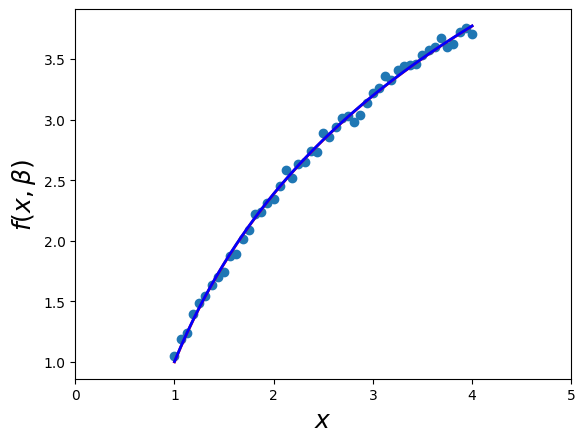

[1.00163089 1.99915634]
3.671707294338075e-06
0.1268208706261225


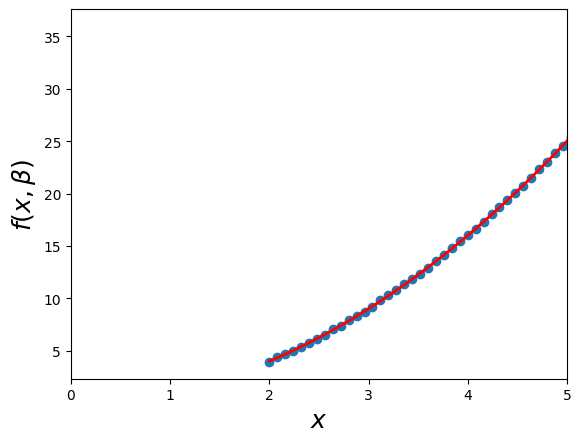

In [38]:
# Решение
# 1
# Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75)
beta = (0.25, 0.75)


def f(x, b0, b1):
    return b0 + b1 * x


# Зададим массив точек xi
xdata = np.linspace(2, 7, 52)
# Создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# Зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
# Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# Вычислим кадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

# Решение
# 2
# Добавим шума в данные, сделанные по функции f(x,b) c коэффициентами b = (0.25, 0.75, 0.5)
beta = (0.25, 0.75, 0.5)


def f(x, b0, b1, b2):
    return b0 + b1 * x * x


# Зададим массив точек xi
xdata = np.linspace(3, 8, 53)
# Создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# Зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
# Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

# Решение
# 3
# Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (1,2)
beta = (1, 2)


def f(x, b0, b1):
    return b0 + b1 * np.log(x)


# Зададим массив точек xi
xdata = np.linspace(1, 4, 49)
# Создадим теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# Зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

# Решение
# 4
# Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (1,2)
beta = (1, 2)


def f(x, b0, b1):
    return b0 * x ** b1


# Зададим массив точек xi
xdata = np.linspace(2, 6, 51)
# Создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# Зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
# Вычисляем линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

#### 1.2 Теоретический материал - Задачи регрессии
Линейная регрессия - это широко используемый метод статистического
анализа, который использует регрессионный анализ в математической
статистике для определения количественной взаимосвязи между двумя или
более переменными. Если регрессионный анализ включает две или более
независимых переменных, а связь между зависимой и независимой
переменными является линейной, тогда имееи дело с множественной линейной
регрессией.
В этом разделе мы увидим, как библиотеку Scikit-Learn в Python для машинного
обучения можно использовать для реализации функций регрессии. Мы начнем
с простой линейной регрессии с участием двух переменных, а затем перейдем к
линейной регрессии с участием нескольких переменных.

#### 1.2.1 Пример
Построим простую линейную регрессию в Python с использованием
библиотеки scikit-learn

(20, 2)


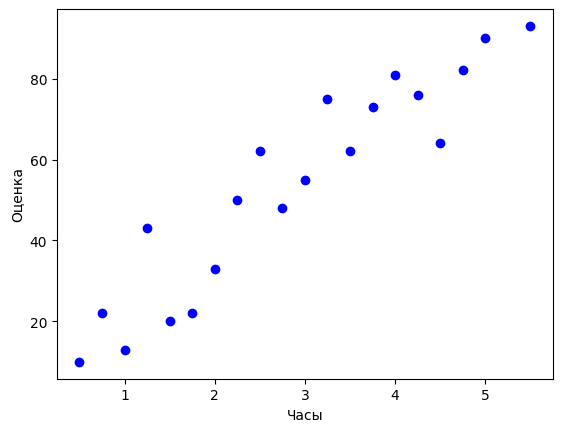

In [39]:
# Импортируем необходимые библиотеки
# Используем pandas и numpy для обработки данных,
# matplotlib для визуализации и sklearn для обучения наборов данных и импорта моделей.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# создадим набор данных для описания взаимосвязи между временем обучения студентов и успеваемостью
my_dict = {'Учебное время': [0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 3.75,
                             4.00, 4.25, 4.50, 4.75, 5.00, 5.50],
           'Оценка': [10, 22, 13, 43, 20, 22, 33, 50, 62, 48, 55, 75, 62, 73, 81, 76, 64, 82, 90, 93]}
dataset = pd.DataFrame(my_dict)
dataset.head()

# Исследуем набор данных
print(dataset.shape)
dataset.describe()

# Нарисуем точечную диаграмму
plt.scatter(dataset['Учебное время'], dataset['Оценка'], color='b', label='данные экзамена')
plt.xlabel('Часы')
plt.ylabel('Оценка')
plt.show()

После того как мы получили представление о данных, разделим информацию
на «атрибуты» и «метки». Атрибуты – это независимые переменные, а метки
– это зависимые переменные, значения которых должны быть предсказаны. В
нашем наборе всего два столбца и необходимо предсказать оценку в
зависимости от количества часов. Чтобы извлечь атрибуты и метки,
выполните следующий скрипт:

In [40]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, :1].values

print(X)
print(y)

# Теперь, когда у нас есть атрибуты и метки, необходимо разделить их на обучающий и тестовый наборы
# Приведенный фрагмент разделяет 80%  данных на обучающий набор, а 20% данных - на набор тестов
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Далее можно обучить алгоритм линейной регрессии
# Необходимо импортировать класс LintearRegression, создать его экземпляр и вызвать метод fit()
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Приведем получившиеся коэффициенты для линии регресии
print(regressor.intercept_)
print(regressor.coef_)

[[0.5 ]
 [0.75]
 [1.  ]
 [1.25]
 [1.5 ]
 [1.75]
 [2.  ]
 [2.25]
 [2.5 ]
 [2.75]
 [3.  ]
 [3.25]
 [3.5 ]
 [3.75]
 [4.  ]
 [4.25]
 [4.5 ]
 [4.75]
 [5.  ]
 [5.5 ]]
[[0.5 ]
 [0.75]
 [1.  ]
 [1.25]
 [1.5 ]
 [1.75]
 [2.  ]
 [2.25]
 [2.5 ]
 [2.75]
 [3.  ]
 [3.25]
 [3.5 ]
 [3.75]
 [4.  ]
 [4.25]
 [4.5 ]
 [4.75]
 [5.  ]
 [5.5 ]]
[0.]
[[1.]]


Получившийся результат можно интерпретировать следующим образом: с
каждым затраченным часом на обучение результат экзамена повышается
приблизительно на 17 баллов. Далее можно построить прогнозы. Для этого мы
будем использовать наши тестовые данные и посмотрим, насколько точно наш
алгоритм предсказывает процентную оценку. Чтобы сделать прогноз на
тестовых данных необходимо выполнить следующий код:

In [ ]:
y_pred = regressor.predict(X_test)
# сравним фактические значения с прогнозируемыми
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

# Визуализируем результат сравнения в виде гистограммы
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linecache='0.5', color='black')

# построим линию регрессии с тестовыми данными
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)

plt.show()

#### Задание:
Постройте модель линейной регрессии для произвольных данных из двух
столбцов. Для примера можно взять точечную зависимость заработной платы от
опыта работы:
(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-
regression/master/Salary_Data.csv).
Найдите коэффициенты линии регрессии. Постройте прогноз.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

csv1 = pd.read_csv(
    'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv')
dataset = pd.DataFrame(csv1)
plt.scatter(dataset['YearsExperience'], dataset['Salary'], color='b', label='Зависимость зарплаты от опыта работы')
plt.xlabel('Опыт')
plt.ylabel('Зарплата')
plt.show()
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# далее можно обучить алгоритм линейной регрессии
# необходимо импортировать класс LinearRegression, создать его экземпляр и вызвать метод fit()
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# приведем получившиеся коэффициенты для линии регресии
print(regressor.intercept_)
print(regressor.coef_)
y_pred = regressor.predict(X_test)
# сравним фактические значения с прогнозируемыми
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

#### 1.3 Теоретический материал - Множественная регрессия
В предыдущем примере мы проиллюстрировали линейную регрессию
с двумя переменными. Однако, почти все реальные задачи имеют больше
параметров. Линейная регрессия с участием нескольких переменных
называется «множественной линейной регрессией» или многомерной
линейной регрессией. Шаги для выполнения множественной линейной
регрессии аналогичны шагам для простой . Разница заключается в оценке.
Вы можете использовать множественную регрессию, чтобы узнать, какой
фактор оказывает наибольшее влияние на прогнозируемый результат или
как различные переменные связаны друг с другом.

#### 1.3.1 Пример
#### Задача:
Для решения задачи множественной регрессии можно задействовать уже
известный метод numpy.linalg.lstsq.

In [41]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

y = [1, 2, 3, 4, 3, 4, 5, 3, 5, 5, 4, 5, 4, 5, 4, 5, 6, 0, 6, 3, 1, 3, 1]
X = [[0, 2, 4, 1, 5, 4, 5, 9, 9, 9, 3, 7, 8, 8, 6, 6, 5, 5, 5, 6, 6, 5, 5],
     [4, 1, 2, 3, 4, 5, 6, 7, 5, 8, 7, 8, 7, 8, 7, 8, 6, 8, 9, 2, 1, 5, 6],
     [4, 1, 2, 5, 6, 7, 8, 9, 7, 8, 7, 8, 7, 4, 3, 1, 2, 3, 4, 1, 3, 9, 7]]

# Формируем DataFrame из двух списков
new_y = np.array(y)
new_y = new_y.transpose()
df1 = pd.DataFrame(new_y)
new_X = np.array(X)
new_X = new_X.transpose()
df2 = pd.DataFrame(new_X)
df1 = df1.rename(columns={0: 'y'}, inplace=False)
df2 = df2.rename(columns={0: 'x1', 1: 'x2', 2: 'x3'}, inplace=False)

frames = [df1, df2]
dataset = pd.concat([df1, df2], axis=1, join='inner')
dataset.head()

# изучим данные
print(dataset.shape)
dataset.describe()

# Разделим данные на метки и атрибуты
X = dataset[['x1', 'x2', 'x3']]
y = dataset['y']

# Разделим данные на обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Для обучения алгоритма мы выполняем тот же код, что и раньше, используя метод fit() класса LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Выведем коэффициенты модели
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

# Чтобы сделать прогнозы на тестовых данных, выполните следующий код
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

# Последний шаг - оценить производительность алгоритма. Мы сделаем это, найдя занчения для MSE
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

(23, 4)
Mean Squared Error: 1.3272699242343065


#### Задание
Постройте модель множественной линейной регрессии для произвольных
данных из нескольких столбцов. Для примера можно взять потребления
газа (в миллионах галлонов) в 48 штатах США или набор данных о
качестве красного вина (1) и (2) соответственно. Найдите коэффициенты
множественной регрессии. Постройте прогноз.
1.
https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/pe
trol_consumption.csv
2. https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-
Quality/master/winequality-red.csv

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

url = pd.read_csv('https://raw.githubusercontent.com/aniruddhachoudhury/'
                  'Red-Wine-Quality/master/winequality-red.csv')
y = [url.quality]
x = [url.pH, url.alcohol, url.density]

new_y = np.array(y)
new_y = new_y.transpose()
df1 = pd.DataFrame(new_y)
new_x = np.array(x)
new_x = new_x.transpose()
df2 = pd.DataFrame(new_x)
df1 = df1.rename(columns={0: 'y'}, inplace=False)
df2 = df2.rename(columns={0: 'x1', 1: 'x2', 2: 'x3'}, inplace=False)
frames = [df1, df2]
dataset = pd.concat([df1, df2], axis=1, join="inner")

print(dataset.head())
print(dataset.shape)
print(dataset.describe())

x = dataset[['x1', 'x2', 'x3']]
y = dataset['y']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(x_train, y_train)
coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])

print(coeff_df)

y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test,
                   'Predicted': y_pred})
print(df)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

   y    x1   x2      x3
0  5  3.51  9.4  0.9978
1  5  3.20  9.8  0.9968
2  5  3.26  9.8  0.9970
3  6  3.16  9.8  0.9980
4  5  3.51  9.4  0.9978
(1599, 4)
                 y           x1           x2           x3
count  1599.000000  1599.000000  1599.000000  1599.000000
mean      5.636023     3.311113    10.422983     0.996747
std       0.807569     0.154386     1.065668     0.001887
min       3.000000     2.740000     8.400000     0.990070
25%       5.000000     3.210000     9.500000     0.995600
50%       6.000000     3.310000    10.200000     0.996750
75%       6.000000     3.400000    11.100000     0.997835
max       8.000000     4.010000    14.900000     1.003690
    Coefficient
x1    -0.821542
x2     0.402203
x3    15.382387
      Actual  Predicted
1109       6   5.938915
1032       5   5.305409
1002       7   6.180197
487        6   5.617153
979        5   5.790899
...      ...        ...
794        6   6.578206
813        4   5.903352
1322       5   6.106185
704        4   5.394